# Example notebook for analysing BGC IAF output

In [1]:
%matplotlib inline

import cosima_cookbook as cc
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import cartopy.crs as ccrs
import xarray as xr
import cmocean.cm as cmocean
import glob
import matplotlib.path as mpath
import matplotlib.colors as col

import logging
logging.captureWarnings(True)
logging.getLogger('py.warnings').setLevel(logging.ERROR)

from dask.distributed import Client

# change to your own directory on /g/data/:
figdir = '/g/data/v45/akm157/figures/BGC_IAF/'

In [2]:
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/43637/status,
Dashboard: /proxy/43637/status,Workers: 4
Total threads: 8,Total memory: 100.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:33725,Workers: 4
Dashboard: /proxy/43637/status,Total threads: 8
Started: Just now,Total memory: 100.00 GiB
Comm: tcp://127.0.0.1:41189,Total threads: 2
Dashboard: /proxy/35063/status,Memory: 25.00 GiB
Nanny: tcp://127.0.0.1:40773,


In [10]:
session = cc.database.create_session()

expt = '01deg_jra55v140_iaf_cycle4'

start_time='1992-01-01'
# If you're having trouble with the amount of data, test your script with a shorter time period:
#end_time='1993-12-31'
end_time='2021-12-31'

In [8]:
from cosima_cookbook import explore
dbx = explore.DatabaseExplorer #(session=session)
dbx

cosima_cookbook.explore.DatabaseExplorer

In [11]:
ee = explore.ExperimentExplorer(session=session, experiment=expt)
ee

ExperimentExplorer(children=(HTML(value='\n            <h3>Experiment Explorer</h3>\n\n            <p>Select a…

In [13]:
# /g/data/cj50/access-om2/raw-output/access-om2-01/01deg_jra55v140_iaf_cycle4/
# ocean-3d-v-1-monthly-mean-ym_2018_12.nc


In [ ]:
dic = cc.querying.getvar(control, 'dic', master_session, ncfile='oceanbgc-3d%monthly%',start_time=start_time, end_time=end_time)


## Compute climatology of DIC:

In [6]:
# This is really slow to do in 3D for the whole globe, so let's just pick a transect:

longitude = 0

dic = cc.querying.getvar(control, 'dic', master_session, ncfile='oceanbgc-3d%monthly%',start_time=start_time, end_time=end_time)
dic = dic.sel(time=slice(start_time,end_time)).sel(xt_ocean=longitude,method='nearest')
# compute climatology:
dic = dic.groupby('time.month').mean('time')
dic = dic.load()

# examples for different variables:
# alkalinity:
# alk = cc.querying.getvar(control, 'alk', master_session, ncfile='oceanbgc-3d%monthly%',start_time=start_time, end_time=end_time)
# iron:
# fe = cc.querying.getvar(control, 'fe', master_session, ncfile='oceanbgc-3d%monthly%',start_time=start_time, end_time=end_time)
# nitrate:
# no3 = cc.querying.getvar(control, 'no3', master_session, ncfile='oceanbgc-3d%monthly%',start_time=start_time, end_time=end_time)
# oxygen:
# o2 = cc.querying.getvar(control, 'no3', master_session, ncfile='oceanbgc-3d%monthly%',start_time=start_time, end_time=end_time)
# phytoplankton:
# phy = cc.querying.getvar(control, 'phy', master_session, ncfile='oceanbgc-3d%monthly%',start_time=start_time, end_time=end_time)
# net primary production:
# NPP = cc.querying.getvar(control, 'npp3d', master_session, ncfile='oceanbgc-3d%monthly%',start_time=start_time, end_time=end_time)

Exception during reset or similar
Traceback (most recent call last):
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.07/lib/python3.9/site-packages/sqlalchemy/pool/base.py", line 757, in _finalize_fairy
    fairy._reset(pool, transaction_was_reset)
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.07/lib/python3.9/site-packages/sqlalchemy/pool/base.py", line 1016, in _reset
    pool._dialect.do_rollback(self)
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.07/lib/python3.9/site-packages/sqlalchemy/engine/default.py", line 683, in do_rollback
    dbapi_connection.rollback()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 22929240971072 and this is thread id 22927941621504.
Exception closing connection <sqlite3.Connection object at 0x14da530784e0>
Traceback (most recent call last):
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.07/lib/python3.9/site-pa

## Example plots:

(5500.0, 0.0)

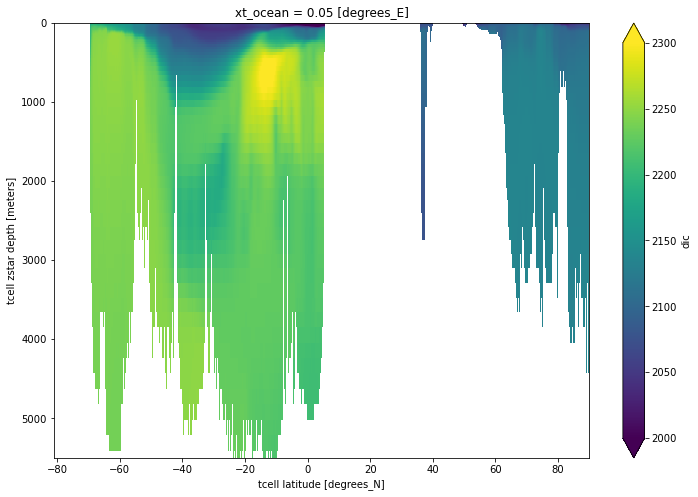

In [13]:
# plot annual mean transect:
plt.figure(figsize=(12,8))
dic.mean('month').plot(vmin=2000,vmax=2300)
plt.ylim(5500,0)